# 동읍 예시

In [ ]:
import os
import pandas as pd
from pathlib import Path

csv_files = []
input_folder = './csv_merged'

for dirpath, dirnames, filenames in os.walk(input_folder):
    for filename in filenames:
        if filename.endswith(".csv"):
            csv_files.append(Path(dirpath) / filename)
csv_files

# csv_files 있는 모든 xlsx 파일을 읽어서 각각 csv로 저장
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

for csv_file in csv_files:
    # csv_file의 이름 추출하여 df 이름으로 사용
    df_name = csv_file.stem.replace(" ", "_").replace("-", "_").replace(".", "_")
    # csv 파일 읽어서 df_name의 이름을 가진 DataFrame으로 저장.
    globals()[df_name] = pd.read_csv(csv_file)
    print(f"Loaded {csv_file} into DataFrame '{df_name}' with shape {globals()[df_name].shape}")


In [ ]:
# 추이를 추적할 행정동 리스트는 다음과 같음.
"""
# 주민등록인원 추이 추적이 되는 행정동 리스트.

의창구 : 동읍,북면,대산면,의창동,팔룡동,명곡동,봉림동
성산구 : 반송동,용지동,중앙동,상남동,사파동,가음정동,성주동,웅남동
마산합포구 : 구산면,진동면,진북면,진전면,현동,가포동,월영동,문화동,반월중앙동,완월동,자산동,교방동,오동동,합포동,산호동
마산회원구 : 내서읍,회원1동,회원2동,석전동,회성동,양덕1동,양덕2동,합성1동,합성2동,구암1동,구암2동,봉암동
진해구 : 충무동,여좌동,태백동,경화동,병암동,석동,이동,자은동,덕산동,풍호동,웅천동,웅동1동,웅동2동
"""

# 행정동 편입에 따른 이상치 ( 의창구 용지동 -> 성산구 용지동 ) 변화에 대응하기위해 편입 당월 데이터의 흐름을 고려하여 데이터 프레임 재편.
"""
의창구 동읍, 북면, 대산면, 의창동, 팔룡동, 명곡동, 봉림동은 ui-chang_df를 그대로 써도 됨.
성산구 반송동, 상남동, 사파동, 가음정동, 성주동, 웅남동은 seongsan_df를 그대로 써도 됨.
마산합포구 구산면, 진동면, 진북면, 진전면, 현동, 가포동, 월영동, 문화동, 완월동, 자산동,
            합포동, 산호동은 masanhappo_df를 그대로 써도 됨.
마산회원구 내서읍, 회원1동, 회원2동, 회성동, 양덕1동, 양덕2동, 합성1동, 합성2동, 구암1동,
            구암2동, 봉암동은 masanhwewon_df를 그대로 써도 됨.
진해구 여좌동, 태백동, 경화동, 병암동, 석동, 이동, 자은동, 덕산동, 풍호동, 웅천동, 웅동1동,
            웅동2동은 jinhae_df를 그대로 써도 됨.
"""

# 의창구_아파트_merged에서 '시군구' 고유값 추출
unique_ui_chang = globals()['의창구_아파트_merged']['시군구'].unique()
# 사전순으로 정렬
unique_ui_chang.sort()

# 성산구_아파트_merged에서 '시군구' 고유값 추출
unique_seongsan = globals()['성산구_아파트_merged']['시군구'].unique()
unique_seongsan.sort()

# 마산합포구_아파트_merged에서 '시군구' 고유값 추출
unique_masanhappo = globals()['마산합포구_아파트_merged']['시군구'].unique()
unique_masanhappo.sort()

# 마산회원구_아파트_merged에서 '시군구' 고유값 추출
unique_masanhwewon = globals()['마산회원구_아파트_merged']['시군구'].unique()
unique_masanhwewon.sort()

# 진해구_아파트_merged에서 '시군구' 고유값 추출
unique_jinhae = globals()['진해구_아파트_merged']['시군구'].unique()
unique_jinhae.sort()

# 의창구 행정동 리스트를 순회하며 데이터프레임 생성
for dong in unique_ui_chang:
    df_name = f"{dong}_merged"
    globals()[df_name] = globals()['의창구_아파트_merged'][globals()['의창구_아파트_merged']['시군구'] == dong].copy()
    print(f"Created DataFrame '{df_name}' with shape {globals()[df_name].shape}")

# 성산구 행정동 리스트를 순회하며 데이터프레임 생성
for dong in unique_seongsan:
    df_name = f"{dong}_merged"
    globals()[df_name] = globals()['성산구_아파트_merged'][globals()['성산구_아파트_merged']['시군구'] == dong].copy()
    print(f"Created DataFrame '{df_name}' with shape {globals()[df_name].shape}")

# 마산합포구 행정동 리스트를 순회하며 데이터프레임 생성
for dong in unique_masanhappo:
    df_name = f"{dong}_merged"
    globals()[df_name] = globals()['마산합포구_아파트_merged'][globals()['마산합포구_아파트_merged']['시군구'] == dong].copy()
    print(f"Created DataFrame '{df_name}' with shape {globals()[df_name].shape}")

# 마산회원구 행정동 리스트를 순회하며 데이터프레임 생성
for dong in unique_masanhwewon:
    df_name = f"{dong}_merged"
    globals()[df_name] = globals()['마산회원구_아파트_merged'][globals()['마산회원구_아파트_merged']['시군구'] == dong].copy()
    print(f"Created DataFrame '{df_name}' with shape {globals()[df_name].shape}")

# 진해구 행정동 리스트를 순회하며 데이터프레임 생성
for dong in unique_jinhae:
    df_name = f"{dong}_merged"
    globals()[df_name] = globals()['진해구_아파트_merged'][globals()['진해구_아파트_merged']['시군구'] == dong].copy()
    print(f"Created DataFrame '{df_name}' with shape {globals()[df_name].shape}")

In [ ]:
# 모든 생성된 데이터프레임을 하나의 리스트에 저장
merged_dfs = [var_name for var_name in globals() if var_name.endswith("_merged")]
print(f"Total merged DataFrames created: {len(merged_dfs)}")

# 이중 '동읍' 키워드가 포함된 데이터프레임만 필터링
dong_eup_dfs = [var_name for var_name in merged_dfs if "동읍" in var_name]
print(f"DataFrames containing '동읍': {dong_eup_dfs}")

# 해당 데이터프레임들을 하나로 통합
dong_eup_merged = pd.concat([globals()[df_name] for df_name in dong_eup_dfs], ignore_index=True)
dong_eup_merged.sort_values(by=['계약년월'], inplace=True)
print(f"Combined '동읍' DataFrame shape: {dong_eup_merged.shape}")

In [ ]:
# '시군구', '계약년월', '거래금액' 컬럼만 추출
동읍_아파트_df = dong_eup_merged[['시군구', '계약년월', '거래금액(만원)']]
print(f"'동읍' DataFrame with selected columns:\n{동읍_아파트_df.head()}")

# 결측치 확인
print(f"Missing values in '동읍' DataFrame:\n{동읍_아파트_df.isnull().sum()}")


In [ ]:
# 거래금액 컬럼에 str타입이 있는지 확인
if 동읍_아파트_df['거래금액(만원)'].apply(lambda x: isinstance(x, str)).any():
    print("There are string values in '거래금액(만원)' column.")
    동읍_아파트_df['거래금액(만원)'] = 동읍_아파트_df['거래금액(만원)'].str.replace(',', '').astype(float)
    
# 헤드 출력
print(동읍_아파트_df.head())

                   시군구    계약년월  거래금액(만원)
896  경상남도 창원의창구 동읍 용잠리  201501   12200.0
892  경상남도 창원의창구 동읍 용잠리  201501    7300.0
891  경상남도 창원의창구 동읍 용잠리  201501   13100.0
894  경상남도 창원의창구 동읍 용잠리  201501    7150.0
893  경상남도 창원의창구 동읍 용잠리  201501    7000.0


In [39]:
# '계약년월'값이 같은 행끼리 '거래금액(만원)'값을 합산하고, 평균을 구해서 새로운 데이터프레임에 '계약년월', '평균거래금액(만원)' 컬럼으로 저장. 평균의 소숫점은 버림.
동읍_아파트_avg = 동읍_아파트_df.groupby('계약년월', as_index=False)['거래금액(만원)'].mean()
동읍_아파트_avg['거래금액(만원)'] = 동읍_아파트_avg['거래금액(만원)'].apply(lambda x: int(x))
동읍_아파트_avg.rename(columns={'거래금액(만원)': '평균거래금액(만원)'}, inplace=True)

In [41]:
# 평균거래금액에 대한 Lag 컬럼 생성
동읍_아파트_avg['평균거래금액_Lag1'] = 동읍_아파트_avg['평균거래금액(만원)'].shift(1)

# 변화율 컬럼 생성
동읍_아파트_avg['변화율'] = 동읍_아파트_avg['평균거래금액(만원)'].pct_change() * 100
동읍_아파트_avg['변화율'] = 동읍_아파트_avg['변화율'].round(2)

# 동읍_아파트_avg의 변화율 컬럼을 시각화

In [55]:
# 시각화를 위한 라이브러리 임포트
# csv 호출
# case폴더안에 있는 csv파일들을 호출
# 호출할때, 각 csv파일들을 해당 파일이름의 데이터프레임으로 저장

import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_list = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
print(font_list)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시 마이너스 표기

['NanumGothic Eco', 'NanumMyeongjo', 'NanumSquare', 'NanumMyeongjo', 'NanumSquareRound', 'NanumGothicCoding', 'Nanum Pen Script', 'NanumGothic Eco', 'NanumGothicCoding', 'NanumSquare_ac', 'NanumSquareRound', 'NanumGothic', 'NanumBarunpen', 'Nanum Brush Script', 'NanumMyeongjo Eco', 'NanumBarunGothic', 'NanumBarunGothic', 'NanumMyeongjo', 'NanumGothic', 'NanumBarunGothic', 'NanumGothic Eco', 'NanumSquare', 'NanumGothic', 'NanumSquareRound', 'NanumSquare', 'NanumGothic', 'NanumSquareRound', 'NanumMyeongjo YetHangul', 'NanumBarunGothic', 'NanumSquare', 'NanumBarunGothic YetHangul', 'NanumSquare_ac', 'NanumBarunpen', 'NanumMyeongjo Eco', 'NanumMyeongjo Eco', 'NanumSquare_ac', 'NanumSquare_ac', 'NanumGothic Eco', 'NanumMyeongjo Eco']


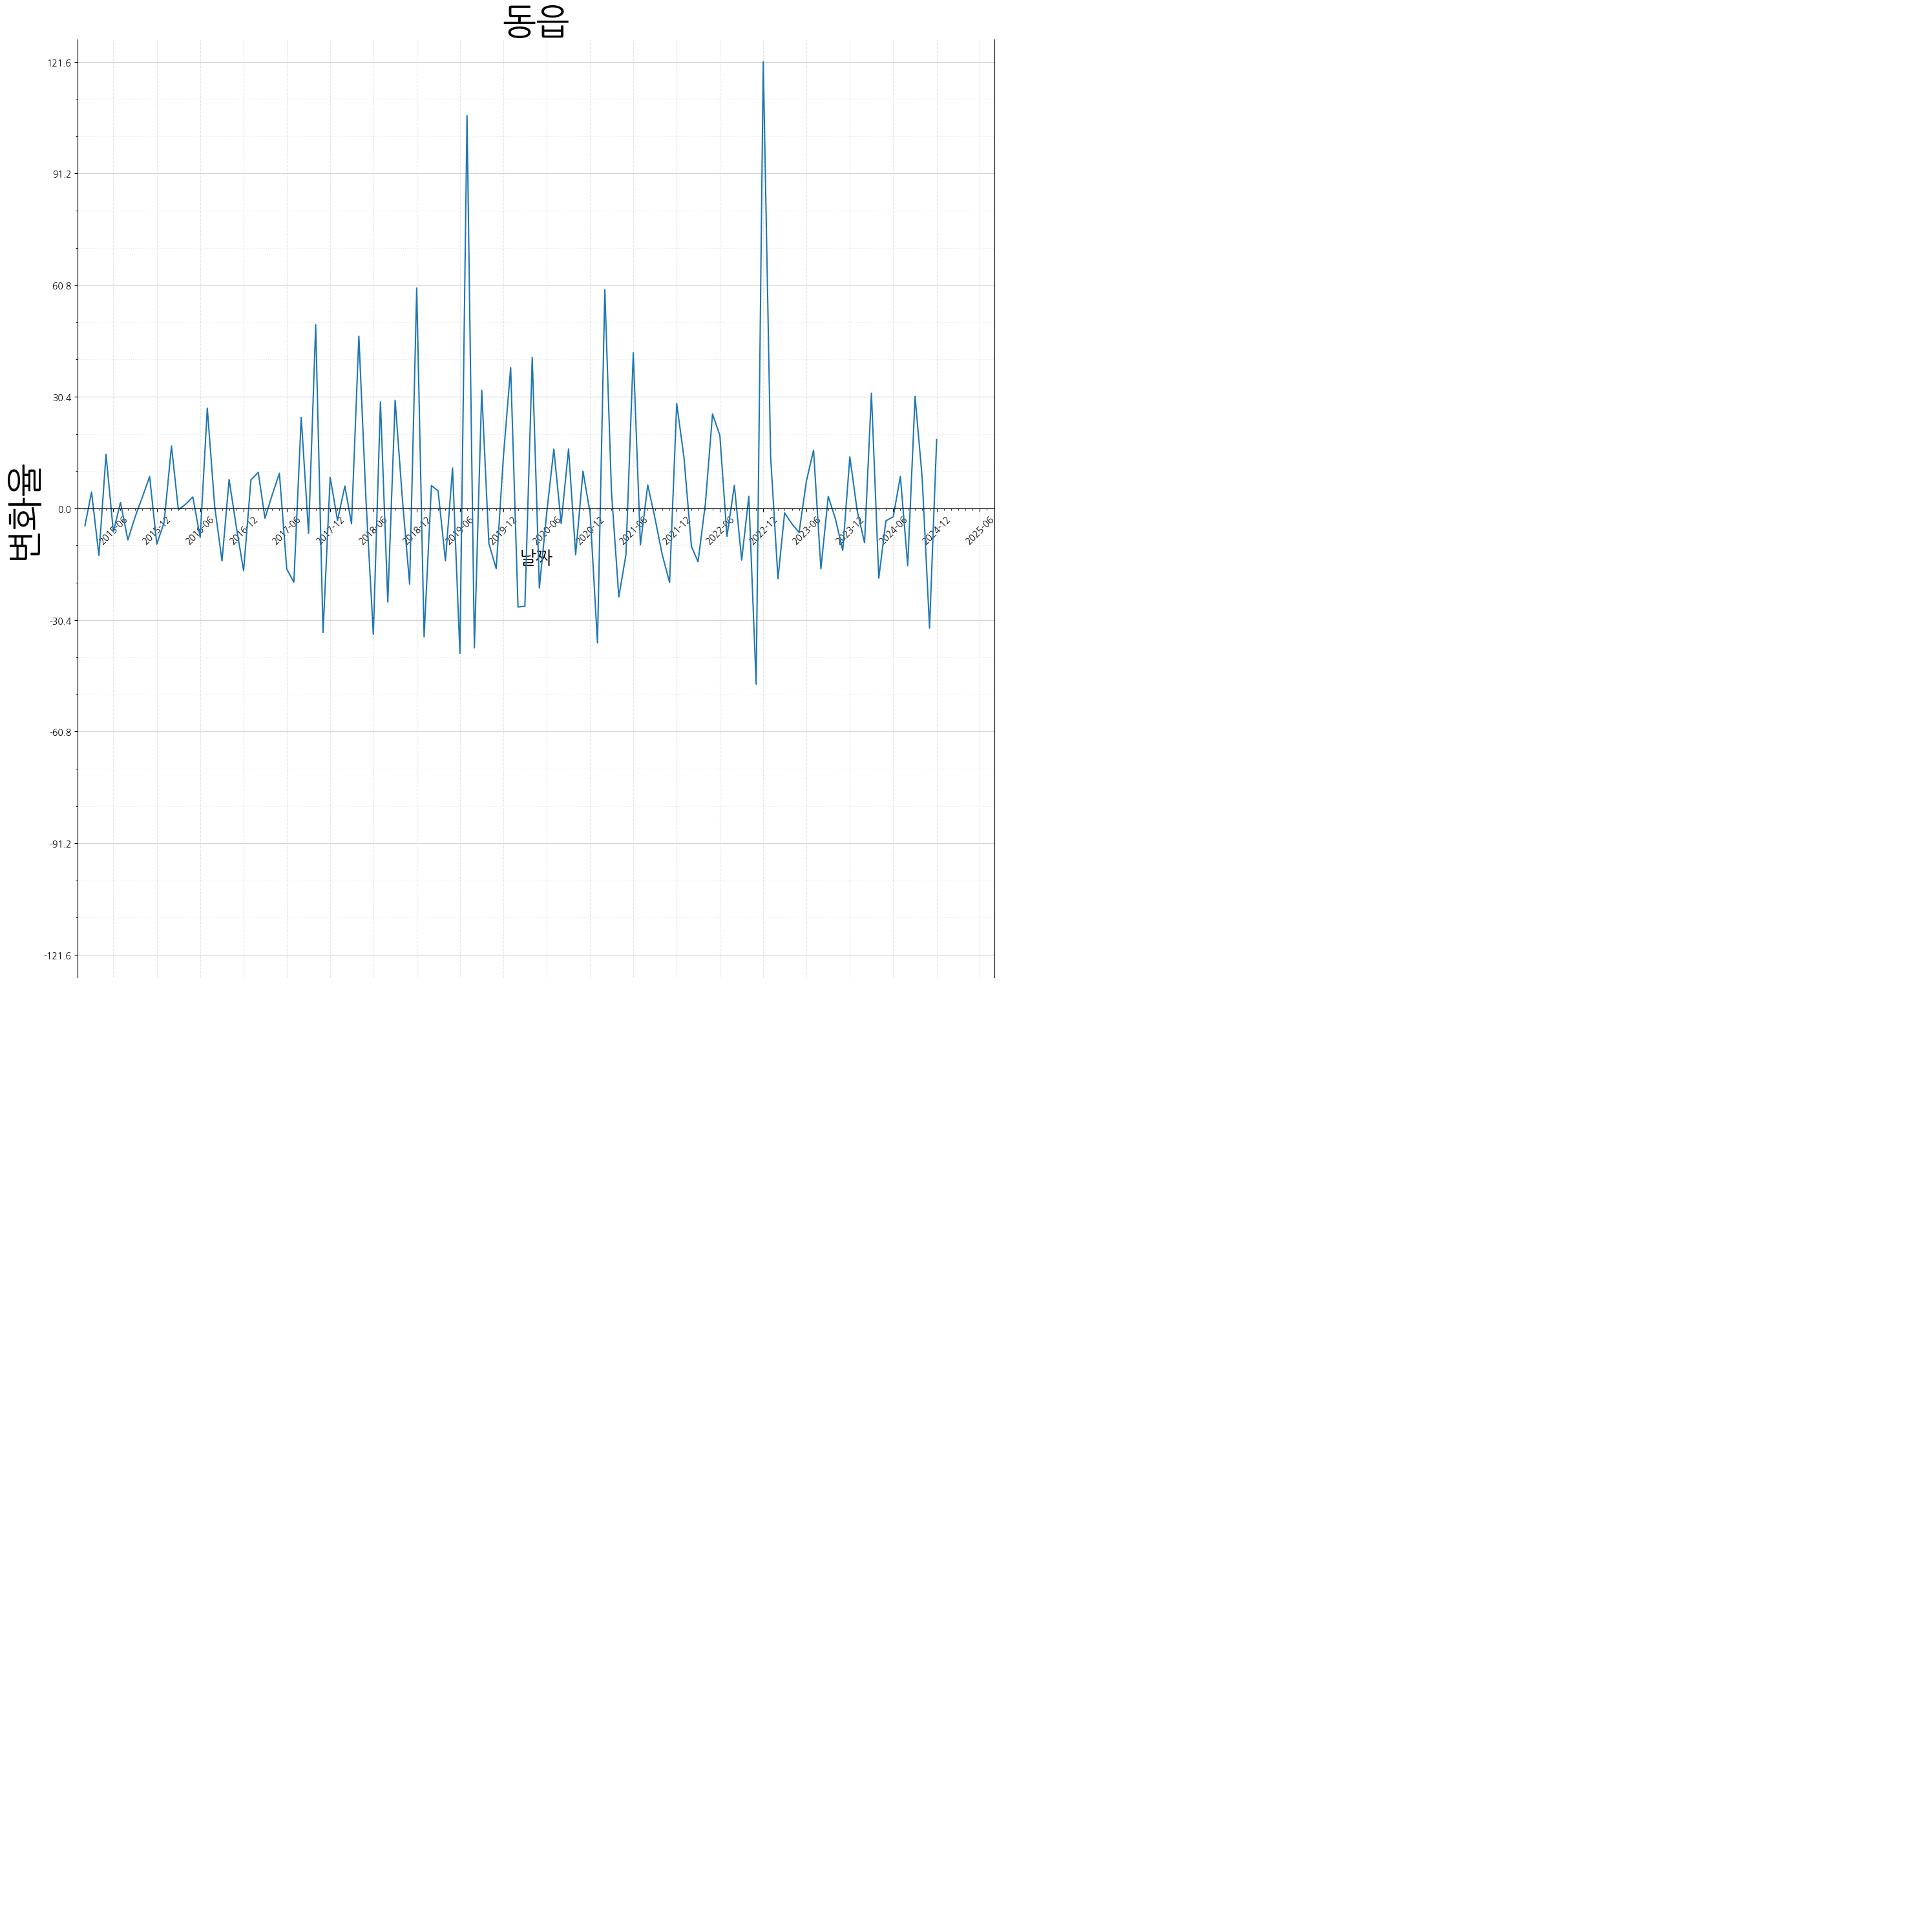

Saved 0.png


In [56]:
# ...existing code...
# df_list가 데이터프레임의 평탄한 리스트인지, 아니면 리스트-오브-리스트인지 모두 처리하는 코드입니다.
import itertools
x_min_dt = pd.Timestamp('2015-01-01')
x_max_dt = pd.Timestamp('2025-08-01')
TICK_INTERVAL_MONTHS = 6  # 월 단위 동일 간격

def flatten(lst):
    for item in lst:
        if isinstance(item, list):
            yield from flatten(item)
        else:
            yield item

def chunked(iterable, n):
    it = iter(iterable)
    while True:
        batch = list(itertools.islice(it, n))
        if not batch:
            break
        yield batch

# 단일 DataFrame 또는 (중첩) 리스트 모두 지원
if isinstance(동읍_아파트_avg, pd.DataFrame):
    flattened = [동읍_아파트_avg]
else:
    flat_list = list(flatten(동읍_아파트_avg))
    flattened = [df for df in flat_list if isinstance(df, pd.DataFrame)]

ncols = 2
nrows = 2
n_plots_per_page = ncols * nrows
count = 0

for chunk in chunked(flattened, n_plots_per_page):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 30))
    axes = axes.flatten()

    for idx, df in enumerate(chunk):
        ax = axes[idx]

        if df is None or (hasattr(df, "empty") and df.empty):
            ax.set_axis_off()
            continue

        # plotting column
        plot_col = '변화율' if '변화율' in df.columns else None
        if plot_col is None:
            ax.set_axis_off()
            continue

        series = df[plot_col].dropna()
        if series.empty:
            ax.set_axis_off()
            continue

        max_abs = max(abs(series.min()), abs(series.max()))
        pad = max(0.1, max_abs * 0.05)
        y_min, y_max = -max_abs - pad, max_abs + pad

        df_plot = df.copy()
        df_plot['date'] = pd.to_datetime(df_plot['계약년월'].astype(str), format='%Y%m', errors='coerce')

        sns.lineplot(data=df_plot, x='date', y=plot_col, ax=ax)
        ax.set_title("동읍", fontsize=40)
        ax.set_xlabel("날짜", fontsize=20)
        ax.set_ylabel("변화율", fontsize=40)
        ax.set_xlim(x_min_dt, x_max_dt)
        ax.set_ylim(y_min, y_max)

        # x축: 월 단위 동일 간격 및 포맷
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=TICK_INTERVAL_MONTHS))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_minor_locator(mdates.MonthLocator())
        ax.tick_params(axis='x', labelrotation=45)

        # 0 기준선 맞추기 시도
        try:
            ax.spines['bottom'].set_position(('data', 0))
        except Exception:
            pass

        ax.spines['top'].set_visible(False)
        ax.tick_params(axis='x', bottom=True, top=False, labelbottom=True, labeltop=False)

        step = max(1e-6, (max_abs / 4) if max_abs > 0 else 1)
        ax.yaxis.set_major_locator(mticker.MultipleLocator(step))
        ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(3))
        ax.grid(which='major', axis='y', linestyle='-', color='lightgray', linewidth=0.8)
        ax.grid(which='minor', axis='y', linestyle=':', color='lightgray', alpha=0.5)

        # x축 그리드
        ax.grid(which='major', axis='x', linestyle='--', color='lightgray', alpha=0.6)

    # 남는 서브플롯 비활성화 (루프 바깥에서, 변수명 충돌 방지)
    for ax_rest in axes[len(chunk):]:
        ax_rest.set_axis_off()

    plt.tight_layout()
    fig.savefig(f"{count}.png", dpi=300)
    plt.show()
    print(f"Saved {count}.png")
    count += 1
# ...existing code...